
# Create a feature vector 

In [211]:
# Functions

from skimage import io
from skimage import filters, color
from skimage import transform
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import numpy as np
import os
import fnmatch

def dir2filename(dirName):
    # read files from directory
    matches = []    
    for root, dirnames, filenames in os.walk(dirName):
        for filename in fnmatch.filter(filenames, '*.[jp]*'):
            matches.append(os.path.join(root,filename))
            print('({}/{})'.format(root,filename))

    print("Number of image files", len(matches))
    
    return matches
    
    
def img2fv(fileName, img_row, img_col):
    
    digit_y = fileName.split('-')[-1].split('.')[0]    

    digit = io.imread(fileName)
    gray_image = color.rgb2gray(digit)
    thresh = filters.threshold_mean(gray_image)
    binary_image = gray_image > thresh
    
    #find an object from image
    label_objects, nb_labels = ndi.label(np.invert(binary_image))
    
    #create feature vector
    digit_x = np.zeros((1,(img_row*img_col)), dtype='float64')
    digit_fv = np.zeros((1,(img_row*img_col)+1), dtype='float64')

    for i in(range(1,nb_labels)):
        tmp = label_objects == i
        r, = np.where(tmp.sum(axis=1) > 1)
        c, = np.where(tmp.sum(axis=0) > 1)

        # crop with border
        tmp_img = gray_image[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)]
        digit_x = transform.resize(tmp_img, (img_row,img_col), mode='reflect')
        digit_x = digit_x.reshape((1,(img_row*img_col)))
        
        tmp_digit_data = np.hstack((digit_y, digit_x[0,:]))       
        digit_fv = np.vstack((digit_fv, tmp_digit_data))                

    # remove first row
    digit_fv = np.delete(digit_fv, 0, 0)
    
    return digit_fv

In [148]:
# define size of the digit
img_row = 28
img_col = 28

output_filename = 'digit_fv.train'
    
# input directory
dirName = 'image'
matches = dir2filename(dirName)
feature = np.zeros((1,(img_row*img_col)+1), dtype='float64')

for i in(range(0,len(matches))):
    print("#", i+1)
    # create feature vector
    digit_fv = img2fv(matches[i], img_row, img_col)      
    feature = np.vstack((feature, digit_fv))

# delete the first zero value row
feature = np.delete(feature, 0, 0)
print("Feature vector size", feature.shape)
    
# save feature vector to text file
print("Save feature vector to file", output_filename)
with open(output_filename,"ab") as f:
    f.write("\n".join(" ".join(map(str, x)) for x in (feature)))
f.close()

(image/digit-6.png)
(image/digit-7.png)
(image/digit-9.png)
(image/digit-5.png)
(image/digit-1.png)
(image/digit-2.png)
(image/digit-0.png)
(image/digit-8.png)
(image/digit-4.png)
(image/digit-3.png)
('Number of image files', 10)
('#', 1)
('#', 2)
('#', 3)
('#', 4)
('#', 5)
('#', 6)
('#', 7)
('#', 8)
('#', 9)
('#', 10)
('Feature vector size', (978, 785))
('Save feature vector to file', 'digit_fv.train')


# Load a feature vector file

In [149]:
import numpy as np

output_filename = 'digit_fv.train'
digit_data = np.loadtxt(output_filename, dtype='float64')

print("Size of the feature vector", digit_data.shape)
print digit_data[0:10,0:]

('Size of the feature vector', (978, 785))
[[ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]]


# Nearest Centroid Classifier

In [213]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = digit_data[:,1:]
y = digit_data[:,0]

print("Size of feature vector", X.shape)
print("Size of label", y.shape)

# create a model
clf = NearestCentroid()
clf.fit(X, y)

print X[0,:].shape
print("Actual", y[0])
print("Predict", clf.predict([X[0,:]]))

('Size of feature vector', (978, 784))
('Size of label', (978,))
(784,)
('Actual', 6.0)
('Predict', array([ 6.]))


# Prediction

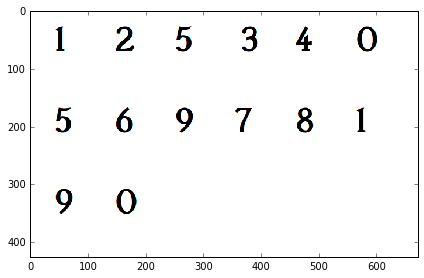

In [216]:
test_img = 'test-image/test-img2.png'
img = io.imread(test_img)
io.imshow(img)
io.show()

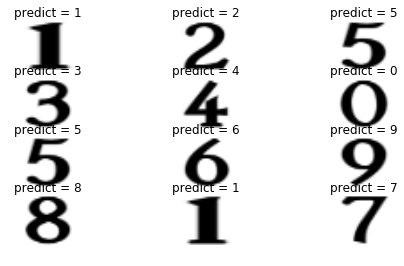

In [225]:
from matplotlib import pyplot as plt

img_row = 28
img_col = 28

digit_fv = img2fv(test_img, img_row, img_col)
X = digit_fv[:,1:]

#digit_x = digit_x.reshape((1,(img_row*img_col)))
tmp = X[0].reshape((img_row,img_col))
tmp = tmp.astype(float)

#show crop image
#rc = int(math.ceil(math.sqrt(X.shape[0])))
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8,4))

cnt = 0
for i in(range(0, 4)):
    for j in(range(0, 3)):
        tmp = X[cnt].reshape((img_row, img_col))
        tmp = tmp.astype(float)
        axes[i,j].imshow(tmp) 
        axes[i,j].set_axis_off()  
        pre_out = clf.predict([X[cnt]])
        tmp_title = "predict = " + str(int(pre_out))
        axes[i,j].set_title(tmp_title) 
        
        cnt = cnt+1